In [ ]:
pip install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

for images, labels in train_loader:
    print(f'Batch size: {images.size()}')
    break


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 37700957.62it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1058156.97it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9280920.53it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6468770.38it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Batch size: torch.Size([32, 1, 28, 28])


In [ ]:
import torch
import torch.nn as nn

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.final_conv = nn.Conv2d(64, 64, kernel_size=7)

        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.final_conv(x)
        return x

encoder = Encoder()
input_tensor = torch.rand(32, 1, 28, 28)
output_tensor = encoder(input_tensor)
print(output_tensor.shape)


torch.Size([32, 64, 1, 1])


In [ ]:
import torch
import torch.nn as nn

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.conv_transpose1 = nn.ConvTranspose2d(64, 32, kernel_size=7, stride=1)
        self.conv_transpose2 = nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.conv_transpose3 = nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1)

        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.relu(self.conv_transpose1(x))
        x = self.relu(self.conv_transpose2(x))
        x = self.relu(self.conv_transpose3(x))
        return x


decoder = Decoder()
input_tensor = torch.rand(32, 64, 1, 1)
output_tensor = decoder(input_tensor)
print(output_tensor.shape)


torch.Size([32, 1, 28, 28])


In [ ]:
import torch.optim as optim


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = nn.Sequential(Encoder(), Decoder()).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for data in train_loader:
        inputs, _ = data
        inputs = inputs.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')

print('Training complete')


Epoch 1, Loss: 0.011370724440117677
Epoch 2, Loss: 0.0031936781639854113
Epoch 3, Loss: 0.0026328247246022026
Epoch 4, Loss: 0.002392385588772595
Epoch 5, Loss: 0.0022501965490480265
Epoch 6, Loss: 0.0021453532015283903
Epoch 7, Loss: 0.002073311158455908
Epoch 8, Loss: 0.0020152656930188338
Epoch 9, Loss: 0.00196547889187932
Epoch 10, Loss: 0.0019258914203072587
Training complete


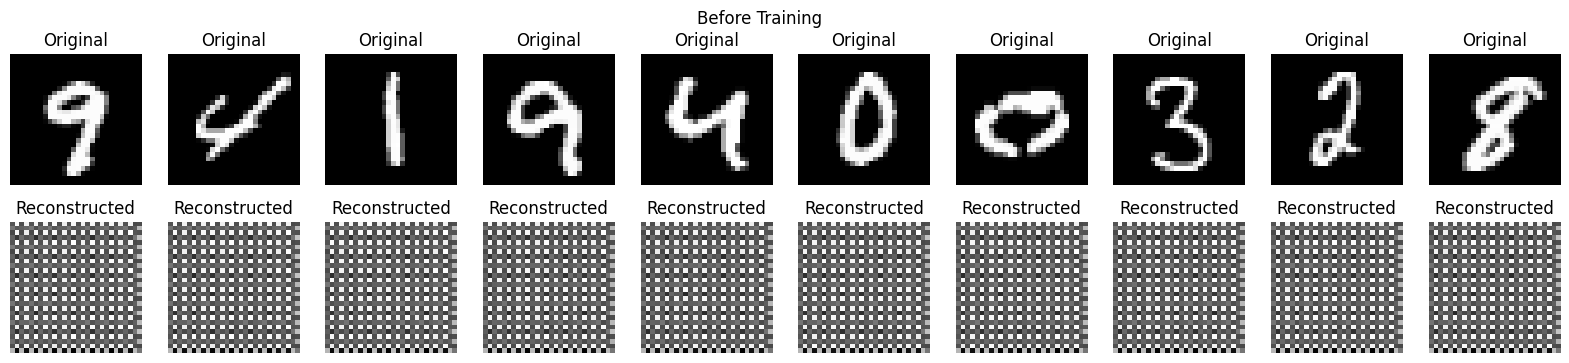

Epoch 1, Loss: 0.011335510953764122
Epoch 2, Loss: 0.0033731392032156386
Epoch 3, Loss: 0.0027588339302688837
Epoch 4, Loss: 0.002495559863311549
Epoch 5, Loss: 0.0023247744555274646
Epoch 6, Loss: 0.0022018458345284065
Epoch 7, Loss: 0.002112768097718557
Epoch 8, Loss: 0.0020410453621298075
Epoch 9, Loss: 0.0019860818817590675
Epoch 10, Loss: 0.0019443072308475773
Training complete


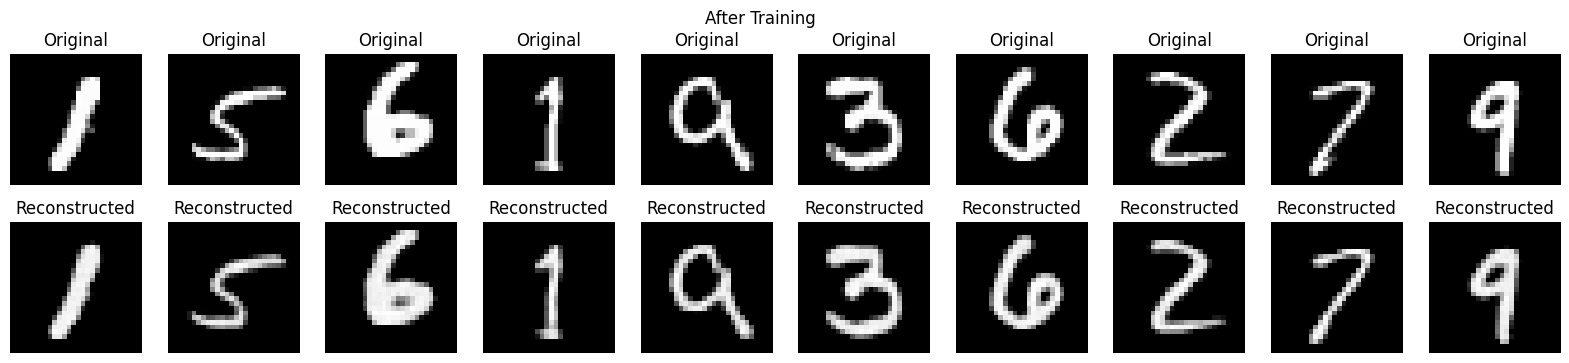

In [ ]:
import torch
import matplotlib.pyplot as plt

def visualize_reconstruction(model, data_loader, device, title="Before Training"):
    model.eval()
    figure, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 4))
    plt.suptitle(title)

    batch = next(iter(data_loader))
    images, _ = batch
    images = images.to(device)
    outputs = model(images)

    for i in range(10):
        ax = axes[0, i]
        original = images[i].cpu().squeeze().numpy()
        ax.imshow(original, cmap='gray')
        ax.set_title("Original")
        ax.axis('off')

        reconstructed = outputs[i].detach().cpu().squeeze().numpy()
        reconstructed = (reconstructed - reconstructed.min()) / (reconstructed.max() - reconstructed.min())
        ax = axes[1, i]
        ax.imshow(reconstructed, cmap='gray')
        ax.set_title("Reconstructed")
        ax.axis('off')

    plt.show()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = nn.Sequential(Encoder(), Decoder()).to(device)

visualize_reconstruction(model, train_loader, device, "Before Training")

import torch.optim as optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = nn.Sequential(Encoder(), Decoder()).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10

for epoch in range(epochs):
    running_loss = 0.0
    for data in train_loader:
        inputs, _ = data
        inputs = inputs.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')

print('Training complete')

visualize_reconstruction(model, train_loader, device, "After Training")
